<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/pcb%20raw%20own.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [22]:
import os
os.chdir('/content/drive/My Drive/Raw_PCB')
os.getcwd()

'/content/drive/My Drive/Raw_PCB'

In [23]:
import numpy as np
a=np.load("s_x_train.npy")
b=np.load("s_y_train.npy")
print(a.shape)
print(b.shape)

(2669, 300, 300, 3)
(2669,)


In [0]:
from sklearn.utils import shuffle
(a,b)=shuffle(a,b)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.33, random_state=42)

In [26]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(1788, 300, 300, 3)
(1788,)
(881, 300, 300, 3)
(881,)
4
uint8
4
uint8
4
uint8


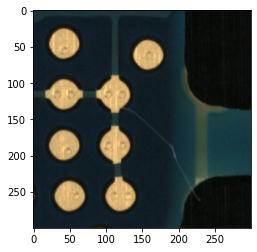

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [29]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788,)


In [30]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
1.0 1.0
0.0 0.0
51.23413
54.232067
3.757295 3.757295
-0.9447202 -0.9447202


In [31]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[1. 0.]


In [32]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [33]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import add
from keras.utils import plot_model
import keras

input1 = keras.layers.Input(shape=(300,300,3))
x0=keras.layers.ZeroPadding2D(padding=(3, 3))(input1)

x1 = Conv2D(300,(7,7),strides=(2,2) ,activation='relu')(x0)
x2=keras.layers.BatchNormalization(axis = 3)(x1)
x3= Activation('relu')(x2)
x4= MaxPooling2D((3, 3), strides=(2, 2))(x3)

x5= Conv2D(200,(2,2),strides=(2,2) ,activation='relu')(x4)
x6=keras.layers.BatchNormalization(axis = 3)(x5)
x7= Activation('relu')(x6)
x8= MaxPooling2D((3, 3), strides=(2, 2))(x7)


x9= Conv2D(200,(2,2),strides=(2,2) ,activation='relu')(x8)
x10=keras.layers.BatchNormalization(axis = 3)(x9)
x11= Activation('relu')(x10)
x12= MaxPooling2D((3, 3), strides=(2, 2))(x11)






o=keras.layers.Flatten()(x11)








out = keras.layers.Dense(100,activation="relu")(o)
out = keras.layers.Dense(100,activation="relu")(out)

out1=keras.layers.Dense(2,activation="softmax")(out)

model = keras.models.Model(inputs=input1, outputs=out1)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 306, 306, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 300)     44400     
_________________________________________________________________
batch_normalization_3 (Batch (None, 150, 150, 300)     1200      
_________________________________________________________________
activation_3 (Activation)    (None, 150, 150, 300)     0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 300)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 200)       2402

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [35]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [36]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.33), batch_size=20,epochs=8, verbose=1)

Train on 1197 samples, validate on 591 samples
Epoch 1/8
1197/1197 [==============================] - 287s 240ms/step - loss: 0.1926 - acc: 0.9415 - val_loss: 0.2111 - val_acc: 0.9323
Epoch 2/8
1197/1197 [==============================] - 286s 239ms/step - loss: 0.1145 - acc: 0.9566 - val_loss: 0.1717 - val_acc: 0.9408
Epoch 3/8
1197/1197 [==============================] - 284s 237ms/step - loss: 0.0656 - acc: 0.9774 - val_loss: 0.1634 - val_acc: 0.9425
Epoch 4/8
1197/1197 [==============================] - 284s 237ms/step - loss: 0.0458 - acc: 0.9841 - val_loss: 0.1625 - val_acc: 0.9442
Epoch 5/8
1197/1197 [==============================] - 283s 237ms/step - loss: 0.0304 - acc: 0.9875 - val_loss: 0.1576 - val_acc: 0.9475
Epoch 6/8
1197/1197 [==============================] - 285s 238ms/step - loss: 0.0239 - acc: 0.9908 - val_loss: 0.1724 - val_acc: 0.9492
Epoch 7/8
1197/1197 [==============================] - 287s 239ms/step - loss: 0.0178 - acc: 0.9958 - val_loss: 0.1706 - val_acc: 0

In [37]:
model.evaluate(xtest,ytest)

881/881 [==============================] - 74s 84ms/step


[0.19851314487669375, 0.9523269013838925]

In [38]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.60      0.14      0.22        44
     class 1       0.96      1.00      0.98       837

    accuracy                           0.95       881
   macro avg       0.78      0.57      0.60       881
weighted avg       0.94      0.95      0.94       881



In [39]:
model.evaluate(xtrain,ytrain)

1788/1788 [==============================] - 152s 85ms/step


[0.06830046287794041, 0.979865772078768]

In [40]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtrain)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytrain,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.68      0.80       105
     class 1       0.98      1.00      0.99      1683

    accuracy                           0.98      1788
   macro avg       0.98      0.84      0.89      1788
weighted avg       0.98      0.98      0.98      1788

